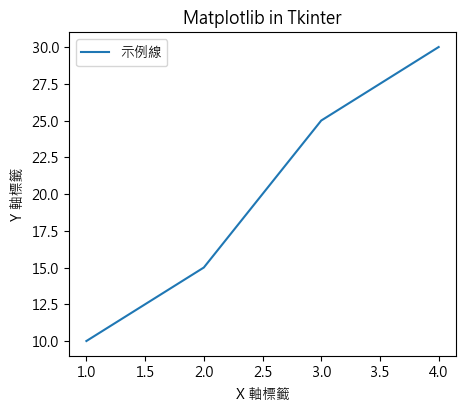

In [11]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'
class MyApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.title("Matplotlib in Tkinter")

        # 創建 ttk.Labelframe
        bottomFrame1 = ttk.Labelframe(self, text="圖1")
        bottomFrame1.pack()

        # 創建 Matplotlib 的 Figure
        fig, ax = plt.subplots(figsize=(5,4.2), dpi=100)
        ax.plot([1, 2, 3, 4], [10, 15, 25, 30], label="示例線")
        ax.set_title("Matplotlib in Tkinter")
        ax.set_xlabel("X 軸標籤")
        ax.set_ylabel("Y 軸標籤")
        ax.legend()

        # 創建 Canvas
        canvas = FigureCanvasTkAgg(fig, master=bottomFrame1)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH)


if __name__ == "__main__":
    app = MyApp()
    app.mainloop()

In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

data1 = {'country': ['A', 'B', 'C', 'D', 'E'],
         'gdp_per_capita': [45000, 42000, 52000, 49000, 47000]
         }
df1 = pd.DataFrame(data1)

data2 = {'year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
         'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
         }  
df2 = pd.DataFrame(data2)

data3 = {'interest_rate': [5, 5.5, 6, 5.5, 5.25, 6.5, 7, 8, 7.5, 8.5],
         'index_price': [1500, 1520, 1525, 1523, 1515, 1540, 1545, 1560, 1555, 1565]
         }
df3 = pd.DataFrame(data3)

root = tk.Tk()

figure1 = plt.Figure(figsize=(6, 5), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df1 = df1[['country', 'gdp_per_capita']].groupby('country').sum()
df1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('Country Vs. GDP Per Capita')

figure2 = plt.Figure(figsize=(5, 4), dpi=100)
ax2 = figure2.add_subplot(111)
line2 = FigureCanvasTkAgg(figure2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df2 = df2[['year', 'unemployment_rate']].groupby('year').sum()
df2.plot(kind='line', legend=True, ax=ax2, color='r', marker='o', fontsize=10)
ax2.set_title('Year Vs. Unemployment Rate')

figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df3['interest_rate'], df3['index_price'], color='g')
scatter3 = FigureCanvasTkAgg(figure3, root)
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend(['index_price'])
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Index Price')

root.mainloop()

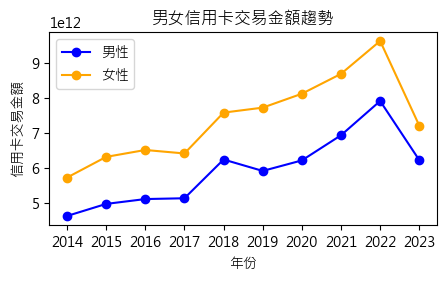

In [59]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

plt.rcParams['font.family'] = 'Microsoft JhengHei'

class MyApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.title("男女信用卡交易金額趨勢")

        # 連接 SQLite 資料庫
        conn = sqlite3.connect("creditcard.db")

        # 撰寫 SQL 查詢，計算每年男性信用卡金額總數
        sql_male = """
            SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
            FROM sex
            WHERE 性別 = '男性'
            GROUP BY 年
        """

        sql_female = """
            SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
            FROM sex
            WHERE 性別 = '女性'
            GROUP BY 年
        """

        sql = """
            SELECT DISTINCT 年
            FROM sex
        """

        # 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
        df_male = pd.read_sql_query(sql_male, conn)
        df_female = pd.read_sql_query(sql_female, conn)
        df = pd.read_sql_query(sql, conn)

        # 關閉資料庫連接
        conn.close()

        # 創建 ttk.Labelframe
        bottomFrame1 = ttk.Labelframe(self, text="男女信用卡交易金額趨勢")
        bottomFrame1.pack()

        # 在 Labelframe 中添加 Canvas
        fig, ax = plt.subplots(figsize=(5, 2.5))  # 調整寬度和高度的值
        canvas = FigureCanvasTkAgg(fig, master=bottomFrame1)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 繪製男性折線圖，使用藍色
        ax.plot(df_male['年'], df_male['信用卡交易總金額'], marker='o', label='男性', color='blue')

        # 繪製女性折線圖，使用紅色
        ax.plot(df_female['年'], df_female['信用卡交易總金額'], marker='o', label='女性', color='orange')

        # 加上標題及標籤
        ax.set_title('男女信用卡交易金額趨勢')
        ax.set_xlabel('年份')
        ax.set_ylabel('信用卡交易金額')
        ax.set_xticks(df['年'])

        # 加上圖例
        ax.legend()

        # 顯示圖表
        canvas.draw()
        
if __name__ == "__main__":
    app = MyApp()
    app.mainloop()


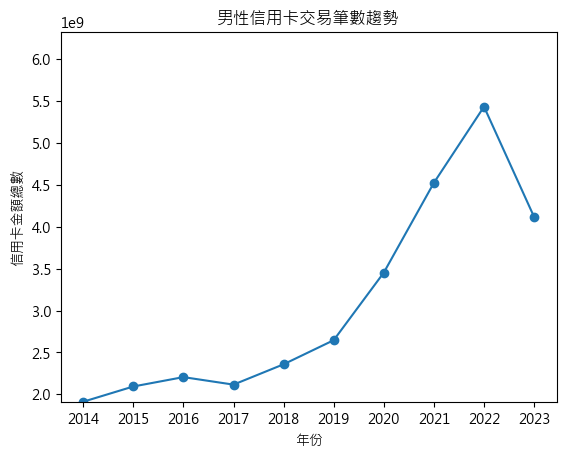

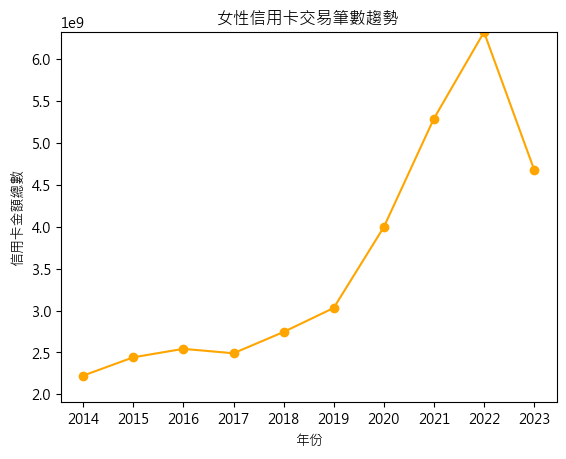

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 連接 SQLite 資料庫
conn = sqlite3.connect("creditcard.db")

# 撰寫 SQL 查詢，計算每年男性信用卡金額總數
sql_male = """
    SELECT 年, SUM(信用卡交易筆數) AS 信用卡交易總筆數
    FROM sex
    WHERE 性別 = '男性'
    GROUP BY 年
"""

sql_female = """
    SELECT 年, SUM(信用卡交易筆數) AS 信用卡交易總筆數
    FROM sex
    WHERE 性別 = '女性'
    GROUP BY 年
"""

# 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
df_male = pd.read_sql_query(sql_male, conn)
df_female = pd.read_sql_query(sql_female, conn)

# 關閉資料庫連接
conn.close()

# 確定 y 軸的上下限
y_min = min(df_male['信用卡交易總筆數'].min(), df_female['信用卡交易總筆數'].min())
y_max = max(df_male['信用卡交易總筆數'].max(), df_female['信用卡交易總筆數'].max())

# 繪製男性折線圖
plt.figure()
plt.plot(df_male['年'], df_male['信用卡交易總筆數'], marker='o')
plt.title('男性信用卡交易筆數趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額總數')
plt.ylim(y_min, y_max)  # 設定 y 軸上下限

# 設定 x 軸刻度為所有年份
plt.xticks(df_male['年'])

# 顯示第一張圖表
plt.show()

# 繪製女性折線圖
plt.figure()
plt.plot(df_female['年'], df_female['信用卡交易總筆數'], marker='o', color='orange')
plt.title('女性信用卡交易筆數趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額總數')
plt.ylim(y_min, y_max)  # 設定 y 軸上下限

# 設定 x 軸刻度為所有年份
plt.xticks(df_female['年'])

# 顯示第二張圖表
plt.show()


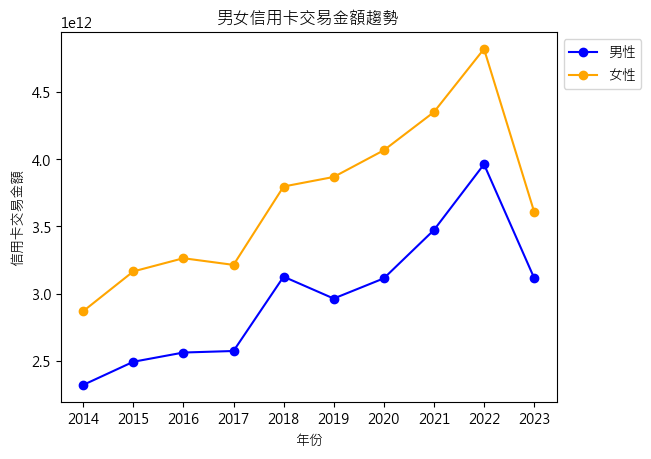

In [7]:
#Sex兩性消費(折線圖)

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 連接 SQLite 資料庫
conn = sqlite3.connect("creditcard.db")

# 撰寫 SQL 查詢，計算每年男性信用卡金額總數
sql_male = """
    SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
    FROM sex
    WHERE 性別 = '男性'
    GROUP BY 年
"""

sql_female = """
    SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
    FROM sex
    WHERE 性別 = '女性'
    GROUP BY 年
"""

sql = """
    SELECT DISTINCT 年
    FROM sex
"""

# 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
df_male = pd.read_sql_query(sql_male, conn)
df_female = pd.read_sql_query(sql_female, conn)
df = pd.read_sql_query(sql, conn)

# 關閉資料庫連接
conn.close()

# 繪製男性折線圖，使用藍色
plt.plot(df_male['年'], df_male['信用卡交易總金額'], marker='o', label='男性', color='blue')

# 繪製女性折線圖，使用紅色
plt.plot(df_female['年'], df_female['信用卡交易總金額'], marker='o', label='女性', color='orange')

# 加上標題及標籤
plt.title('男女信用卡交易金額趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡交易金額')
plt.xticks(df['年'])

# 加上圖例
legend = plt.legend()
legend.set_bbox_to_anchor((1, 1))

# 顯示圖表
plt.show()


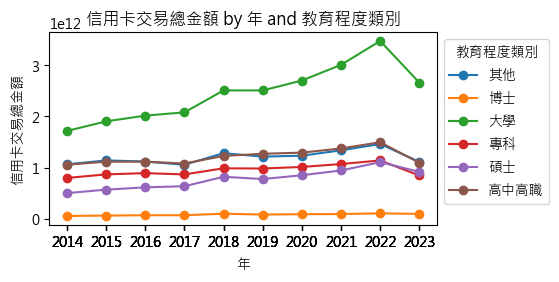

In [60]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

class MyApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.title("教育程度消費")

        # 連接 SQLite 資料庫
        conn = sqlite3.connect("creditcard.db")

        # 撰寫 SQL 查詢
        sql_query = """
        SELECT 年, 教育程度類別, SUM(信用卡金額) AS 信用卡交易總金額
        FROM education
        GROUP BY 年, 教育程度類別
        """

        # 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
        df = pd.read_sql_query(sql_query, conn)

        # 關閉資料庫連接
        conn.close()

        # 創建 ttk.Labelframe
        bottomFrame1 = ttk.Labelframe(self, text="教育程度消費")
        bottomFrame1.pack()

        # 在 Labelframe 中添加 Canvas
        fig, ax = plt.subplots(figsize=(5, 2.5))
        canvas = FigureCanvasTkAgg(fig, master=bottomFrame1)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP)

        # 将数据进行透视以轻松绘图
        pivot_df = df.pivot(index='年', columns='教育程度類別', values='信用卡交易總金額')

        # 绘制折线图
        pivot_df.plot(kind='line', marker='o', linestyle='-', ax=ax)
        ax.set_title('信用卡交易總金額 by 年 and 教育程度類別')
        ax.set_ylabel('信用卡交易總金額')

        legend = ax.legend(title='教育程度類別', bbox_to_anchor=(1, 1), loc='upper left')

        ax.set_xticks(df['年'])

        # 显示图表
        canvas.draw()

if __name__ == "__main__":
    app = MyApp()
    app.mainloop()


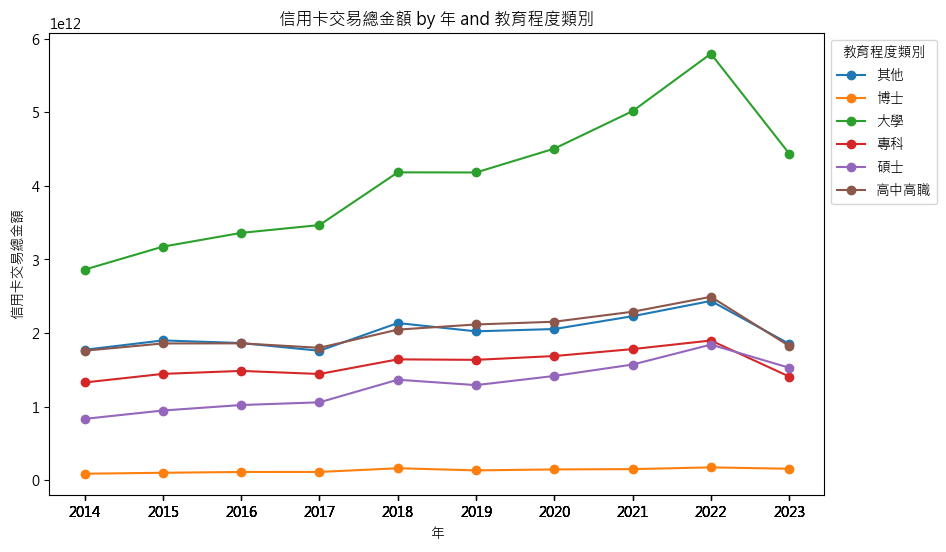

In [5]:
#Education 教育程度消費(折線圖)

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
SELECT 年, 教育程度類別, SUM(信用卡金額) AS 信用卡交易總金額
FROM education
GROUP BY 年, 教育程度類別
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index='年', columns='教育程度類別', values='信用卡交易總金額')

# Plotting the line chart
pivot_df.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('信用卡交易總金額 by 年 and 教育程度類別')
plt.xlabel('年')
plt.ylabel('信用卡交易總金額')
legend = plt.legend(title='教育程度類別')
legend.set_bbox_to_anchor((1, 1))
plt.xticks(df['年'])
plt.show()


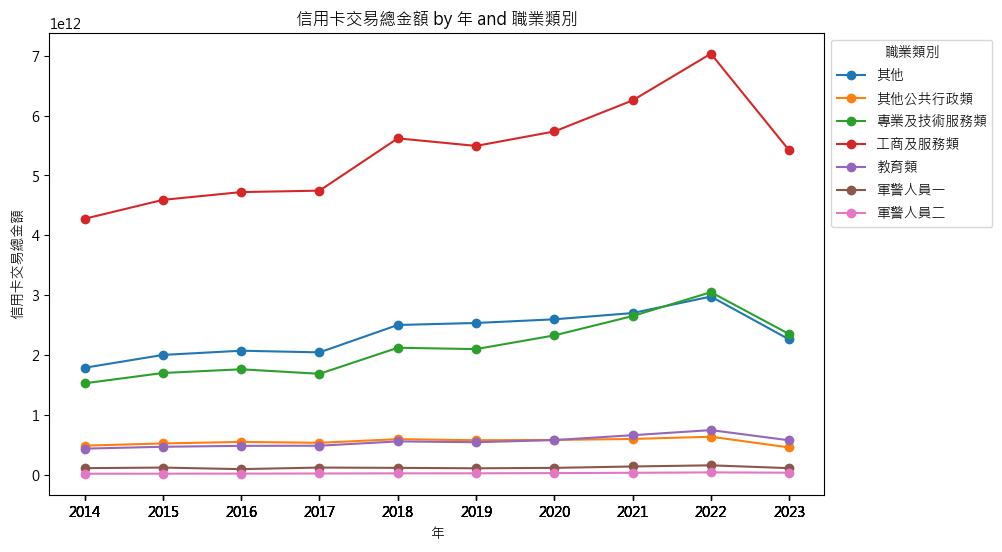

In [9]:
# Job 職業消費(折線圖)
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
SELECT 年, 職業類別, SUM(信用卡金額) AS 信用卡交易總金額
FROM job
GROUP BY 年, 職業類別
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index="年", columns="職業類別", values="信用卡交易總金額")

# Plotting the line chart
pivot_df.plot(kind="line", marker="o", linestyle="-", figsize=(10, 6))
plt.title("信用卡交易總金額 by 年 and 職業類別")
plt.xlabel("年")
plt.ylabel("信用卡交易總金額")
legend = plt.legend(title="職業類別")
plt.xticks(df["年"])
legend.set_bbox_to_anchor((1, 1))
plt.show()

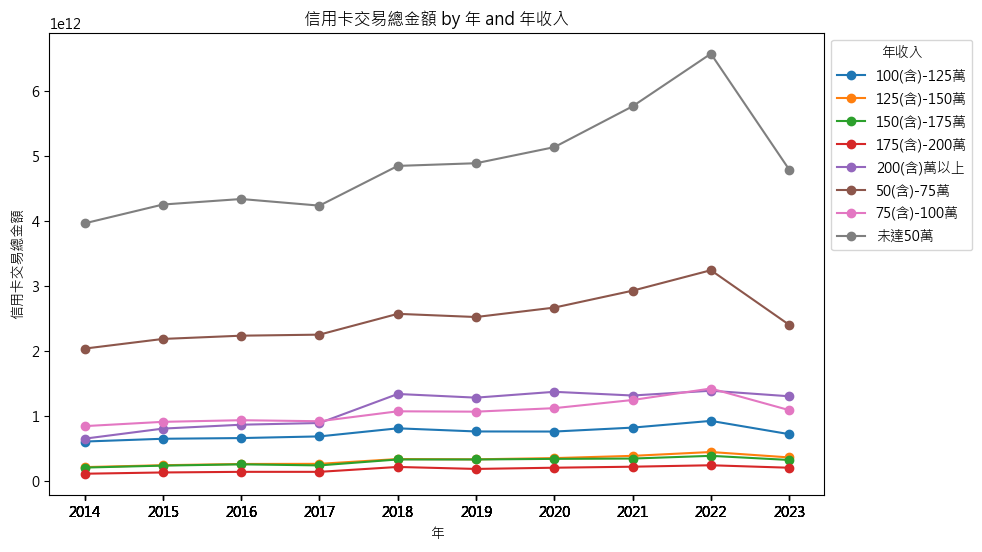

In [10]:
# Incom 年收入消費(折線圖)
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
SELECT 年, 年收入, SUM(信用卡金額) AS 信用卡交易總金額
FROM incom
GROUP BY 年, 年收入
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index="年", columns="年收入", values="信用卡交易總金額")

# Plotting the line chart
pivot_df.plot(kind="line", marker="o", linestyle="-", figsize=(10, 6))
plt.title("信用卡交易總金額 by 年 and 年收入")
plt.xlabel("年")
plt.ylabel("信用卡交易總金額")
legend = plt.legend(title="年收入")
plt.xticks(df["年"])
legend.set_bbox_to_anchor((1, 1))
plt.show()

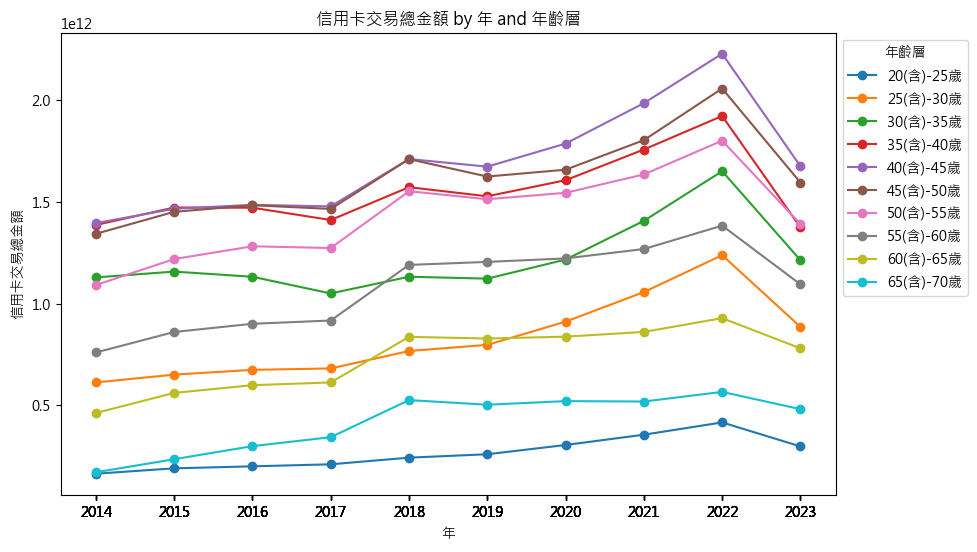

In [27]:
# Age 年齡層消費(折線圖)
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
WITH ranked_data AS (
    SELECT
        年,
        年齡層,
        SUM(信用卡金額) AS 信用卡交易總金額,
        RANK() OVER (PARTITION BY 年 ORDER BY SUM(信用卡金額) DESC) AS rnk
    FROM
        age
    GROUP BY
        年,
        年齡層
)
SELECT
    年,
    年齡層,
    信用卡交易總金額
FROM
    ranked_data
WHERE
    rnk <= 10;
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index="年", columns="年齡層", values="信用卡交易總金額")

# Plotting the line chart
pivot_df.plot(kind="line", marker="o", linestyle="-", figsize=(10, 6))
plt.title("信用卡交易總金額 by 年 and 年齡層")
plt.xlabel("年")
plt.ylabel("信用卡交易總金額")
legend = plt.legend(title="年齡層")
plt.xticks(df["年"])
legend.set_bbox_to_anchor((1, 1))
plt.show()

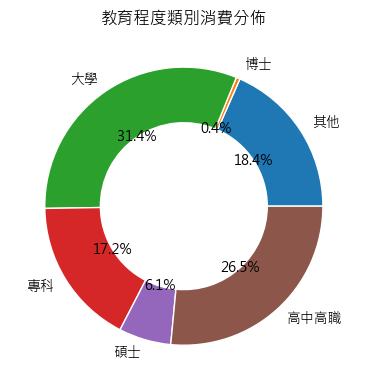

In [1]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

# 設定中文字型
plt.rc('font', family='Microsoft JhengHei')

# 連結資料庫
conn = sqlite3.connect('creditcard.db')

query_condition = "SELECT 教育程度類別 ,信用卡金額 FROM  education group by 教育程度類別"
df = pd.read_sql_query(query_condition, conn)
conn.close()

# 創建Tkinter窗口
root = tk.Tk()
root.title('Matplotlib in Tkinter')

# 創建Matplotlib圖表
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

# 繪製圓餅圖
ax.pie(df['信用卡金額'], labels=df['教育程度類別'], autopct='%1.1f%%',
        wedgeprops=dict(width=0.4, edgecolor='w'))
ax.set_title('教育程度類別消費分佈')

# 將Matplotlib圖表嵌入Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# 啟動Tkinter主迴圈
root.mainloop()
